<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PRN: 18UCS097
### Sujay Rittikar

In [ ]:
# Checking the Tensorflow version
tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


# Importing the Tensorflow library and MNIST dataset provided by keras module

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# Getting the train and test datasets using .load_data() method

In [ ]:
(x_train, Y_train), (x_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# checking the shapes
print(f"x_train shape: {x_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

x_train shape: (60000, 28, 28)
Y_train shape: (60000,)
x_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## We can observe the intensity matrix which have values between 0 and 255

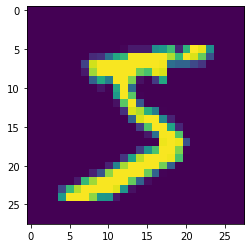

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

# Scaling the training data between 0 and 1

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Convert multidimensional array of intensities to a 1D array

In [ ]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

In [ ]:
x_train[1].shape

(784,)

# One-hot encoding the output data to make it easier for us to interpret the output generated by our training set as particular digits

In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Building our Neural Network model with a sequential contianer to add layers to it.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784, )))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


# Setting the optimizer and loss function for the model
* Stochastic gradient descent as optimizer -> better performance than normal gradient descent
* loss -> Categorical cross entropy as we are working on categorical data

In [ ]:
model.compile(optimizer="sgd", loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

# Fitting the model on data

In [ ]:
model.fit(x_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.3990 - accuracy: 0.8882
Epoch 2/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1925 - accuracy: 0.9446
Epoch 3/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1427 - accuracy: 0.9587
Epoch 4/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.1143 - accuracy: 0.9665
Epoch 5/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.0943 - accuracy: 0.9728
Epoch 6/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.0805 - accuracy: 0.9768
Epoch 7/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0695 - accuracy: 0.9796
Epoch 8/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0607 - accuracy: 0.9821
Epoch 9/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.0531 - accuracy: 0.9843
Epoch 10/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.046

In [ ]:
model.predict(x_test)

array([[2.4049656e-08, 1.1421408e-07, 2.1800626e-05, ..., 9.9991715e-01,
        2.6351063e-06, 6.3459385e-07],
       [7.4086188e-07, 2.7325968e-05, 9.9985516e-01, ..., 1.3628125e-09,
        3.2130469e-05, 2.1662646e-12],
       [2.2820298e-06, 9.9710780e-01, 7.2004931e-04, ..., 8.8874128e-04,
        1.0085953e-03, 9.0631502e-06],
       ...,
       [2.3892280e-10, 4.9062504e-10, 2.6127070e-10, ..., 2.1774722e-06,
        3.8527642e-06, 9.4365314e-06],
       [1.3103401e-07, 4.6814915e-08, 1.5392627e-10, ..., 4.2760133e-09,
        1.3025581e-03, 9.5059541e-08],
       [3.2561181e-07, 1.0089378e-09, 1.3000403e-07, ..., 2.4934587e-11,
        8.3273541e-08, 2.4645124e-11]], dtype=float32)

# Evaluating the model on Test set

In [ ]:
model.evaluate(x_test, Y_test, batch_size=10)

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0753 - accuracy: 0.9764


[0.0753149464726448, 0.9764000177383423]